## This notebook contains our article embedding and clustering results

The pickle file: 500group_count.p, contains a dataframe:

The row of dataframe is the aslyum court case.
Each column of this dataframe is a group of news with similarity determined by k-means clustering.
There are 500 groups in total in this dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('../data/pickles/500group_count.p')

In [7]:
df.shape

(168690, 502)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X, y = df.drop(['Unnamed: 0', 'grant'], axis=1), df['grant']

In [5]:
features = df.drop(['Unnamed: 0', 'grant'], axis=1).columns.values

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## In below training setting, the label is binary, either granted or denied. We only included features of 500 groups

(This is a pipeline test, we will try all court cases for the same process)

## Using Logistic Regression to train a classification model

In [6]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_accuracy = metrics.accuracy_score(LR_model.predict(X_test), y_test)
print("Accuracy = %.3f" % LR_accuracy)

Accuracy = 0.625


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20, tree=True):
    if tree:
        coef = classifier.feature_importances_
    else:
        coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

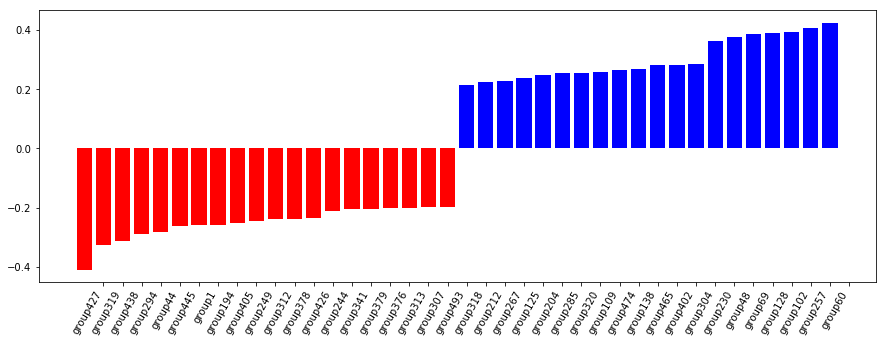

In [11]:
plot_coefficients(LR_model, features, tree=False)

The pickle file group2title2_2001_2005.p contains the below data sturcutre:

```
{ group1: [t1, t2, t3, ...],
  group2: [t1, t2, ...], 
  ...
    }
```

where each list of news title belongs to its group

In [12]:
from utility import pickle_load, pickle_dump
group2titles = pickle_load('../data/pickles/group2titles_2001_2005.p')

## The news titles of each group are clustred together due to their news content similarity in the vector space.

group2title2[59], corresponds to 60th group in above plot

In [14]:
group2titles[59]

['World Briefing/ASIA: SRI LANKA: ANOTHER BID FOR PEACE',
 'World Briefing | Asia: Sri Lanka: Rebels Set Condition For Talks',
 'World Briefing | Asia: Sri Lanka: Seeking Roots Of Conflict',
 'World Briefing | Asia: Sri Lanka: Soldiers Held On Rape Charges',
 'World Briefing | Asia: Sri Lanka: No Meeting Rebels Say',
 'World Briefing | Asia: Sri Lanka: Rebels Strike Again',
 'World Briefing | Asia: Sri Lanka: Rebels Continue Attacks',
 'World Briefing | Asia: Sri Lanka: Truce Considered',
 'World Briefing | Asia/Pacific: Sri Lanka: Politics Wont Stop Peace Effort',
 'World Briefing | Asia: Sri Lanka: Top Rebel Killed By Mine',
 'World Briefing | Asia/Pacific: Sri Lanka: 25 Rebels Killed In Sea Battle',
 'World Briefing | Asia: Sri Lanka: Government Rejects Rebel Request',
 'World Briefing | Asia: Sri Lanka: Cease-Fire On Both Sides',
 'World Briefing | Asia: Sri Lanka: Effort To Restart Peace Talks',
 'World Briefing | Asia: Sri Lanka: Meeting On Peace Effort',
 'World Briefing | Asia:

In [15]:
group2titles[256]

['World Briefing | Europe: Ukraine: Victory For Presidents Foe',
 'World Briefing | Europe: Ukraine: Not So Fast Judge Says',
 'World Briefing | Europe: Ukraine: No More Executions',
 'World Briefing | Europe: Ukraine: Government Backtracks On Slaying',
 'World Briefing | Europe: Ukraine: Amnesty Prompts TB Fears',
 'World Briefing | Europe: Ukraine: Bribery Investigation',
 'World Briefing | Europe: Ukraine: New Inquiry On Missing Journalist',
 'World Briefing | Europe: Ukraine: Whistle-Blower Blocked From Running',
 'World Briefing | Europe: Ukraine: Opposition Leader Injured',
 'World Briefing | Europe: Ukraine: Presidents Foe Free To Campaign',
 'World Briefing | Europe: Ukraine: More Blamed In Air Disaster',
 'World Briefing | Europe: Ukraine: Presidents Foe Pursued',
 'World Briefing | Europe: Ukraine: President Tries To Fend Off Foes',
 'World Briefing | Europe: Ukraine: Court Bans Protests',
 'World Briefing | Europe: Ukraine: Protesters Detained',
 'World Briefing | Europe: Uk

In [16]:
group2titles[101]

['Ex-Leader of Belarus Challenges a Punishment by Pension',
 'World Briefing | Europe: Russia: Novelist Faces Pornography Charge',
 'Russian in Recent Cafe Article Is Slain',
 'Russia Declines to Renew Visas For 30 U.S. Peace Corps Workers',
 'Now on Exhibit: Russias Soul Exposed at Table',
 'World Briefing | Europe: Russia: A Gorby By Any Other Name Wont Sell',
 'World Briefing | Europe: Russia: Army Diet Found Lacking',
 'World Briefing | Europe: Russia: No Toast For The Winner',
 'Aleksandr Y. Bovin 73 Who Twitted Kremlin',
 'World Briefing | Europe: Georgia: Warlords Auction Fails',
 'World Briefing | Europe: Russia: Chechen Widows Broadcast Barred',
 'Russian TV Newsman Fired in Media Crackdown']

In [17]:
group2titles[127]

['Burmese Junta in Talks With Democracy Leader',
 'Memo Feeds Concern That Exports to U.S. Help Burmese Junta',
 'For Many Burmese China Is an Unwanted Ally',
 'On the Road to Mandalay an Ethical Predicament',
 'Burmese Dissidents Expected Release May Have Hit a Snag',
 'Burmese Democracy Advocate Is Released From House Arrest',
 'Freed Burmese Democracy Leader Proclaims New Dawn',
 'Burmese Dissident Strikes New Balance With Junta Leaders',
 'Burmese General Says Transition to Democracy Will Be Slow',
 'After Freeing Dissident Burmese Rulers Move Slowly on Reform',
 'Ne Win Ex-Burmese Military Strongman Dies at 81',
 'U.S. Says Evidence Confirms Reports of Mass Rapes by Burmese',
 'In a Contest of Cultures East Embraces West',
 'A Year After Vowing Change Burmese Junta Hardens Line',
 'Burmese Opposition Leader Taken Into Custody After Clashes',
 'Burmese Rulers Close More Offices of Pro-Democracy Party',
 'Burmese Officials Deny Dissident Was Injured',
 'U.N. Envoy Will Try to Visit 

In [18]:
group2titles[68]

['World Briefing | Asia: Sri Lanka: Government Lifts Censorship',
 'World Briefing | Asia: India: Sonia Gandhi To Visit U.S.',
 'World Briefing | Asia: Sri Lanka: Parliament Urged To Reopen',
 'World Briefing | Asia: Sri Lanka: Opposition Ready For Showdown',
 'World Briefing | Asia: Sri Lanka: Protesters Defy Ban',
 'World Briefing | Asia: India: Censure Fails',
 'World Briefing | Asia: Sri Lanka: Vote Postponed',
 'World Briefing | Asia: Bangladesh: Election In October',
 'World Briefing | Asia: Sri Lanka: Parliament Opens After Suspension',
 'World Briefing | Asia: India: Minister Resigns After Setback',
 'World Briefing | Asia/Pacific: Bangladesh: The Voting Begins',
 'World Briefing | Asia: Sri Lanka: Leaders Brother Back On Team',
 'World Briefing | Asia: Sri Lanka: Mud Flies Before Election',
 'World Briefing | Asia: Sri Lanka: Governing Party Sweeps Elections',
 'World Briefing | Asia: Sri Lanka: Ministers Dismissed',
 'World Briefing | Asia: India: New Gandhi In Politics',
 'W

## Using Decision Tree Model to train a classification model

In [75]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_accuracy = metrics.accuracy_score(clf.predict(X_test), y_test)
print("Accuracy = %.3f" % clf_accuracy)

Accuracy = 0.620


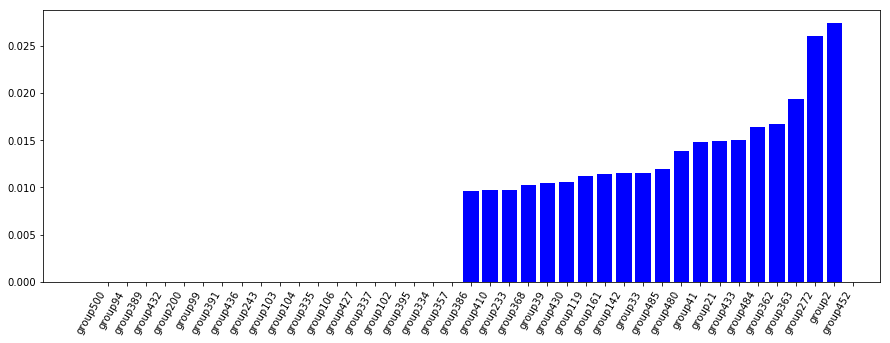

In [78]:
plot_coefficients(clf, features)

In [84]:
rf_accuracy = metrics.accuracy_score(forest.predict(X_test), y_test)
print("Accuracy = %.3f" % rf_accuracy)

Accuracy = 0.620


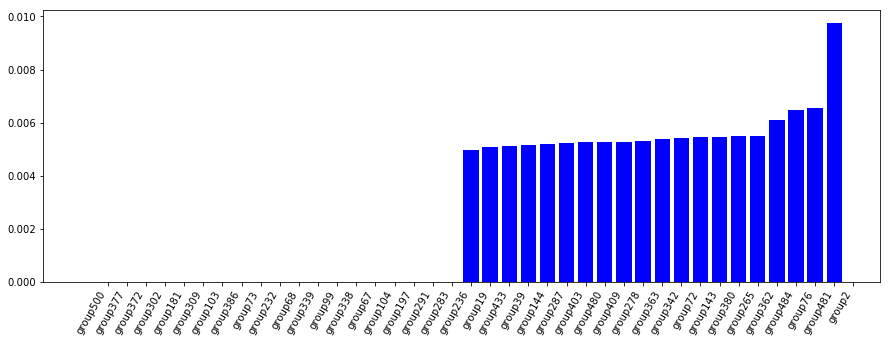

In [85]:
plot_coefficients(forest, features)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rlf = RandomForestClassifier(max_depth=2, random_state=0)
rlf.fit(X, y)
rlf_accuracy = metrics.accuracy_score(rlf.predict(X_test), y_test)
print("Accuracy = %.3f" % rf_accuracy)

Accuracy = 0.620


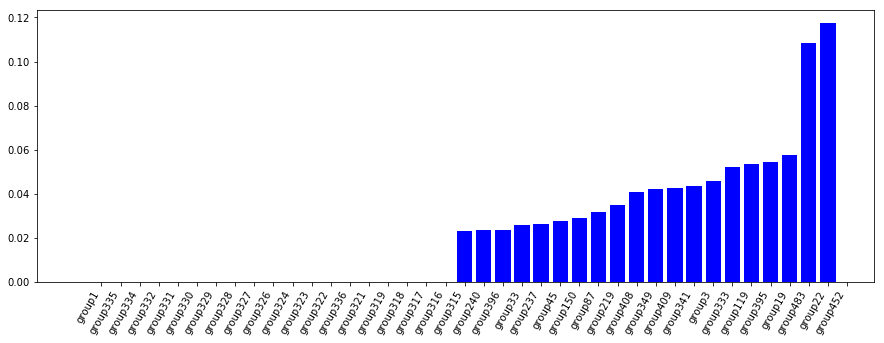

In [87]:
plot_coefficients(rlf, features)

In [90]:
group2titles[453]

['World Briefing/AFRICA: SENEGAL: ELECTION BOLSTERS PRESIDENT',
 'World Briefing | Africa: Chad: Opposition Leaders Released',
 'World Briefing | Africa: Nigeria: Space Plans',
 'World Briefing | Africa: Uganda: Opposition Figure Flees To U.S.',
 'World Briefing | The Africa: Ivory Coast: Leaders Boycott Peace Talks',
 'World Briefing | Africa: Zanzibar: Peace Accord Signed',
 'World Briefing | Africa: Ivory Coast: Back From Exile',
 'World Briefing | Asia: China: South African Leader Looks For Business',
 'World Briefing | Europe: Italy: Royal Exiles Win Round 1',
 'World Briefing | Africa: Kenya: Looking Ahead Before Stepping Down',
 'World Briefing | Africa: Nigeria: Obasanjo To Seek Second Term',
 'World Briefing | Africa: Uganda: Political Restrictions Eased',
 'World Briefing | Asia: Mozambique: Presidential Candidate Chosen',
 'World Briefing | Africa: Nigerian Leader Makes Plea For Stolen Money',
 'World Briefing | Africa: Malawi: President Will Need New Job',
 'World Briefing 

In [ ]:
plt.title('result of k-means clustering over 5 years news')
plt.ylabel('group size')
plt.xlabel('groups')
plt.show()
plt.plot(group_size[:30])
plt.ylabel('group size')
plt.xlabel('groups')
plt.show()
from sklearn.feature_extraction.text import CountVectorizer
all_news = ""
for news in group2titles[1]:
    all_news += news
ngram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
ngram = ngram_vectorizer.fit_transform([all_news])